In [1]:
%matplotlib inline

import numpy as np
import pylab as plt

In [2]:
x = []
y = []

for i in range(2000):
    x0 = np.random.uniform(0,2*np.pi)
    xs = np.linspace(x0,x0+2*np.pi,100)
    x.append(np.sin(xs))
    y.append(0)

for i in range(30):
    m0 = np.random.uniform(0.8,1.2)
    xs = np.linspace(0,1,100)
    x.append(m0*xs)
    y.append(1)

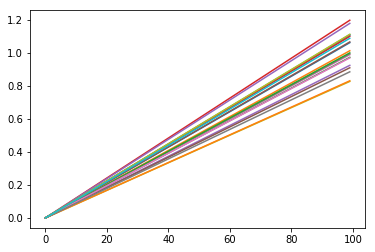

In [3]:
for i in range(20):
    plt.plot(x[i+2000])

In [6]:
from drama.lof_tools import d_lof
from sklearn.metrics import roc_auc_score

In [5]:
score = d_lof(x)

In [ ]:
score

In [7]:
roc_auc_score(y,score)

0.48816666666666675

In [ ]:
unsupervised

semisupervised

novelty



In [ ]:
def grid_run_lof(X_seen,y_seen=None,
                 X_unseen=None,y_unseen=None,
                 n_neighbors = [5,20,35],
                 algorithms = ['ball_tree', 'kd_tree', 'brute'],
                 metrics=None):
    '''         
    This function is able to deal with three modes:
    1- Unsupervised outlier detection 
    2- Semi-supervised outlier detection
    3- Novelty detection  
    '''      
    
    novelty = 0   
    semisupervised = 0 
    if (np.all(y_seen==0)) | (y_seen is None):
        novelty = 1
        X_unseen_p = X_unseen
        y_seen = y_unseen
        print('Novelty detection mode.')
        conds = (X_unseen is not None and y_unseen is not None)
        assert conds,'In novelty detection you need to input the unseen data sets.'
    elif y_unseen is not None and X_unseen is not None:
        semisupervised = 1
#        print('Semi-supervised option is not available for novelty detection.')
        X_unseen_p = None
        print('Semi-supervised outlier detection mode.')
    elif X_seen is not None:
        X_unseen_p = X_unseen
        print('Unsupervised outlier detection mode.')
    else:
        assert 0, 'The configuration is not recognized!'
        
    aucs,mccs,rwss,conf = [],[],[],[]

    for nn in n_neighbors:
        for al in algorithms:
            if metrics is None:
                metrics = VALID_METRICS[al]
            for mt in metrics:
                try:
                    outliers = d_lof(X_seen=X_seen,X_unseen=X_unseen_p,n_neighbors=nn,algorithm=al,metric=mt)
                    conf.append([nn,al,mt])
                    aucs.append(roc_auc_score(y_seen, outliers))
                    mccs.append(MCC(y_seen, outliers))
                    rwss.append(rws_score(y_seen, outliers))
                except:
                    pass

                    
    if semisupervised:
        nn,al,mt = conf[np.argmax(aucs)]
        outliers = d_lof(X_seen=X_unseen,n_neighbors=nn,algorithm=al,metric=mt)
        auc = roc_auc_score(y_unseen, outliers)
        
        nn,al,mt = conf[np.argmax(mccs)]
        outliers = d_lof(X_seen=X_unseen,n_neighbors=nn,algorithm=al,metric=mt)
        mcc = roc_auc_score(y_unseen, outliers)
        
        nn,al,mt = conf[np.argmax(rwss)]
        outliers = d_lof(X_seen=X_unseen,n_neighbors=nn,algorithm=al,metric=mt)
        rws = roc_auc_score(y_unseen, outliers)
        
        return auc,mcc,rws
    
    else:
        return np.array(aucs),np.array(mccs),np.array(rwss),np.array(conf)
